# Exercise Sheet 3: Gaussian Process Regression and Logistic Regression

This repository contains **Exercise Sheet 3**, focusing on advanced regression techniques with practical applications in machine learning.

## Topics Covered

### 1. Gaussian Process Regression
Explore the fundamental concepts of Gaussian Processes, their application in regression, and how they are used to model uncertainty in predictions.  
**Key Concepts:**
- Kernel functions and their role in Gaussian Processes.
- Modeling data with Gaussian Processes.
- Handling uncertainty and optimizing hyperparameters.

### 2. Logistic Regression
Dive into the basics of Logistic Regression, an essential classification algorithm used in binary and multi-class problems.  
**Key Concepts:**
- Sigmoid function and probability estimation.
- Training a logistic regression model.
- Regularization techniques for logistic regression.

## Purpose
This exercise sheet is designed to enhance your understanding of **Gaussian Process Regression** and **Logistic Regression**, providing the tools to model complex relationships in data and make informed predictions.

---


## Chapter 5: Gaussian Process Regression

### 1. Gaussian Processes

**Reading Material: Murphy 15.1 + 15.2 (up to and including 15.2.3)**

In this exercise, we will be implementing the Gaussian process regression formalism discussed in class.  

Suppose we observe a training set $(\mathbf{x}_i, f_i)$ with $i = 1, \ldots, N$ and where $f_i = f(\mathbf{x}_i)$ is a noise-free observation of the function evaluated at $\mathbf{x}_i$. Each $\mathbf{X}$ has dimensionality $D$. Below is just such a set.


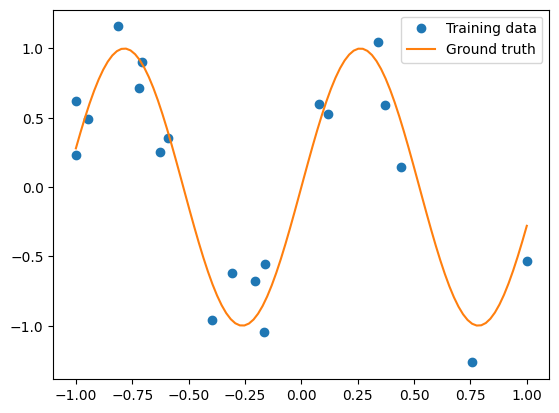

In [1]:
# provided data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x_i = np.random.uniform(-1., 1., 20)
x_i[0] = -1
x_i[-1] = 1
f_i = np.sin(x_i*6)
y_i = f_i + np.random.randn(20)*0.3
x_true = np.linspace(-1, 1, 100)
f_true = np.sin(x_true*6)

plt.plot(x_i, y_i, 'o', label = 'Training data')
plt.plot(x_true, f_true, label = "Ground truth")
plt.legend()

In [2]:
display(len(f_i))

20

1. For the data provided above, what is $D$? What is $N$?

N=20
D=1

2. We need to reformat the training set as $\mathbf{X}$, a $N \times D$ matrix. Reshape the provided $x_i$ set into an $N \times D$ numpy array. Reshape the f_i values into a variable named F, with shape $N \times 1$.

In [3]:
N=20
D=1

x_i_reshape = x_i.reshape(N,D)

F = f_i.reshape(20,1)


3. We will want to evaluate whatever  function we learn using the GP at inputs $\mathbf{X}_*$, with size $N_* \times D$ and predict outputs $\mathbf{f}_*$. In this example, let's predict 100 evenly spaced values for $\mathbf{X}_*$ from -1 to 1, so that when we plot the learned function later, it looks almost continuous. This is our *test* set. Define the variable `X_test` with these specifications, taking care to make it the right shape.

In [4]:
x_star = np.linspace(-1,1,100)
X_test = x_star.reshape(len(x_star),D)

4. The full joint distribution of the training set $\mathbf{f}$ and test set $\mathbf{f_*}$ is given by

$$
\left(\begin{array}{c}
\mathbf{f} \\
\mathbf{f}_{*}
\end{array}\right) \sim \mathcal{N}\left(\left(\begin{array}{c}
\boldsymbol{\mu} \\
\boldsymbol{\mu}_{*}
\end{array}\right),\left(\begin{array}{cc}
\boldsymbol{K} & \boldsymbol{K}_{*} \\
\boldsymbol{K}_{*}^{T} & \boldsymbol{K}_{* *}
\end{array}\right)\right)
$$

where $\mathbf{K} = \kappa (\mathbf{X}, \mathbf{X})$ is an $N \times N$ matrix, $\mathbf{K}_* = \kappa (\mathbf{X}, \mathbf{X}_*)$ is an $N \times N_*$ matrix, and $\mathbf{K}_{**} = \kappa (\mathbf{X}_*, \mathbf{X}_*)$ is an $N_* \times N_*$ matrix, based on the kernel function $\kappa( . )$. We will use the **radial basis function** (RBF) kernel, given by
$$
\kappa\left(\mathbf{x}_i, \mathbf{x}_i^{\prime}\right)= \alpha^2 \exp \left(-\frac{\left\|\mathbf{x}_i-\mathbf{x}_j\right\|^{2}}{2 l^{2}}\right)
$$

   where I've renamed the bandwidth parameter to be $l$ instead of the $\sigma$ in class because another $\sigma$ will enter the story later. The double bars indicate the Euclidean distance. We also introduced the parameter $\alpha$, and $\alpha^2$ corresponds to the variance of the GP.

   Note that the kernel function $\kappa$ recieves two points $\mathbf{x}_i$ and $\mathbf{x}_j$ and returns the function evaluated at those points. But we will need to define $\mathbf{K}$, a matrix which will have dimensions that are "total amount of $\mathbf{x}_i$'s $\times$  total amount of $\mathbf{x}_j$'s". So, just this once, I will encourage you to do something in an actual nested for-loop (just this once!) for the sake of clarity. Every other time in this course, please vectorize your functions.

   And with that long introduction finished, **implement the following functions**. `kappa(x_i, x_j, l, alpha)` should return an element-wise comparison of two individual examples $\mathbf{x}_i$ and $\mathbf{x}_j$. `Kernel(X1, X2)` should return the full matrix $\mathbf{K}$ and should be implemented with two nested for-loops.

In [5]:
def kappa(x_i, x_j, l, alpha):
    exp = np.exp(- ((np.linalg.norm(x_i-x_j))**2) / (2 * l**2))
    return alpha **2 * exp

def Kernel(X1, X2, l, alpha):
    Kappa= np.empty((len(X1),len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            Kappa[i][j] = kappa(X1[i],X2[j], l, alpha)
    return Kappa

5. With our kernel function in hand, let's make a plot of what it looks like! Viusalize the kernel array evaluated for all values in X_test (with X_test inputed twice) using the `plt.imshow()` function for a few (~3) reasonable values of $l$. What does the $l$ parameter represent, intuitively?  [Read about plt.imshow here.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

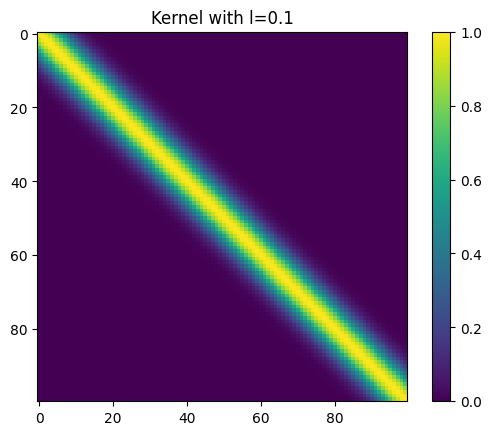

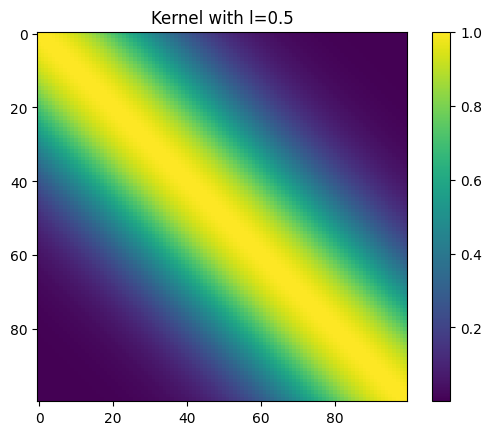

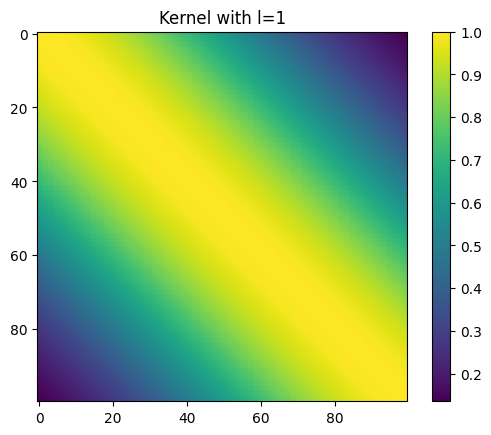

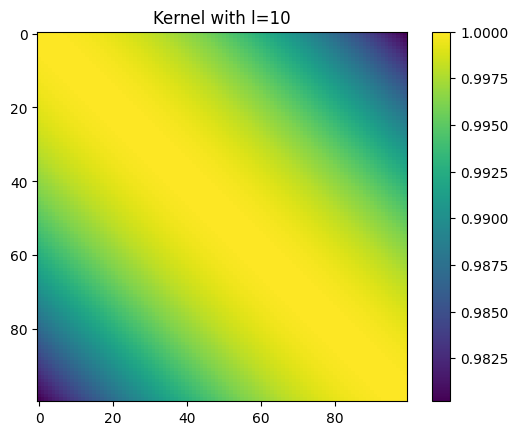

In [6]:
l = [0.1,0.5,1,10]

for value in l:
    Kappa_value = Kernel(X_test, X_test, value, 1)
    plt.imshow(Kappa_value) 
    plt.title(f'Kernel with l={value}')
    plt.colorbar()
    plt.show()  # This is where you actually display the plot

l controls the horizontal lenght scale over which the function varies. It is the analogous of the the standard devition.

Smaller l means narrower band; bigger l means wider band, meaning more correlation; it is the length scale of correlation

6. Now it's time for Gaussian process regression!

Let's start with a recap.

**Noise-free case**. In the absence of measurement noise, the distribution of function values $\mathbf{f}_\ast$ at points $\mathbf{X}_\ast$, conditioned on training data $\mathbf{X}$ and observed function values $\mathbf{f}$, is given by $\mathbf{f}_* \sim \mathcal{N}(\mathbf{f}_*| \boldsymbol{\mu}_*,\boldsymbol{\Sigma}_*)$, where
$$
\boldsymbol{\mu}_{*}=\boldsymbol{K}_{*}^{T} \boldsymbol{K}^{-1} \mathbf{f} \quad \text { and } \quad \boldsymbol{\Sigma}_{*}=\boldsymbol{K}_{* *}-\boldsymbol{K}_{*}^{T} \boldsymbol{K}^{-1} \boldsymbol{K}_{*}
$$
and where
$$
\mathbf{K}=\kappa(\mathbf{X}, \mathbf{X}), \mathbf{K}_{*}=\kappa\left(\mathbf{X}, \mathbf{X}_{*}\right), \text { and } K_{* *}=\kappa\left(\mathbf{X}_{*}, \mathbf{X}_{*}\right)
$$
based on the kernel function $\kappa(\cdot, \cdot)$.

Remember that $\mathbf{f}_* \sim \mathcal{N}(\mathbf{f}_*| \boldsymbol{\mu}_*,\boldsymbol{\Sigma}_*)$ implicitely defines a posterior over **functions**, since we are free to chose $\mathbf{X}_\ast$.

**Noisy case**.  Suppose that we observe now a noisy version of the underlying function.
$$y = f(\mathbf{X}) + \epsilon \\ \text{where} \\ \epsilon \sim \mathcal{N}(0, \sigma_y^2)$$
The above discussion remains untouched, except that the mean and covariance are in this case given by
$$
\boldsymbol{\mu}_{*}=\boldsymbol{K}_{*}^{T} \boldsymbol{K}_{y}^{-1} \mathbf{f} \quad \text { and } \quad \boldsymbol{\Sigma}_{*}=\boldsymbol{K}_{* *}-\boldsymbol{K}_{*}^{T} \boldsymbol{K}_{y}^{-1} \boldsymbol{K}_{*}
$$
where now the covariance of the training data has an additional noise term,
$$
\mathbf{K}_{y} \equiv \mathbf{K}+\sigma_{y}^{2} \mathbf{I}_{N}
$$

**Your Task**

- Implement the function `posterior` below. `x_test` will be $\mathbf{X}_*$, `x_train` is $\mathbf{X}$ and `t_train` will be the corresponding training values $f(\mathbf{x}_i)$, `l` is the bandwidth parameter and `alpha` the (square root of the) variance of the RBF kernel.  Furthermore, `sigma_y` is the noise.
- The function should return the values (1) $\boldsymbol{\mu}_*$, (2)  $\boldsymbol{\Sigma}_*$, i.e. the parameters over the multivariate Gaussian posterior, and (3) the log marginal likelihood (see lecture slides).
   
   Hints: This function should not be long (max 10 lines), now that you have your kernel function in hand. If it is a long function, you may be doing something wrong. As a debugging tip: you can verify that you have the correct dimensions for $\mathbf{K}$, $\mathbf{K}_*$, and $\mathbf{K}_{**}$ by calling `print(K.shape)`.


In [7]:
def posterior(x_test, x_train, t_train, l, sigma_y, alpha):
    noise_Kernel = Kernel(x_train, x_train, l, alpha) + np.identity(len(x_train))* sigma_y**2
    first_product = np.matmul(Kernel(x_train,x_test,l,alpha).T,np.linalg.inv(noise_Kernel))
    mean_star = np.dot(first_product,t_train)
    covariance_star = Kernel(x_test, x_test,l, alpha) - np.matmul(np.matmul(Kernel(x_train, x_test,l,alpha).T, np.linalg.inv(noise_Kernel)), Kernel(x_train, x_test,l,alpha))
    det_K_y = np.linalg.det(noise_Kernel)
    log_ML = -0.5 * np.matmul(t_train.T, np.matmul(np.linalg.inv(noise_Kernel),t_train)) - 0.5 * np.log(det_K_y) - 0.5 * len(x_train) * np.log(2*np.pi) 
    return mean_star, covariance_star, log_ML
    

7. Run your posterior function on the training data provided earlier in this exercise, using `l=0.1`, `alpha = 0.5` and `sigma_y=0.3`, and plot the results.

- Plot 3 samples of the resulting function from the posterior on the same plot as the original training data.
- Plot the $2\sigma$ uncertainty band, all in the same one plot.
- Describe in some detail the certain vs uncertain regions of the plot. Connect back to the material discussed in class.

Notes: You can produce samples by calling `np.random.multivariate_normal`.  [You can read documentation about this function here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html). *Note the types of dimensions that this function needs for the input parameters.*

   The $2 \sigma$ uncertainty interval of the multivariate Gaussian can be calculated as `2*np.sqrt(np.diag(cov))`. Use this value to plot the uncertainty region for your posterior. The function [plt.fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) might be useful here.


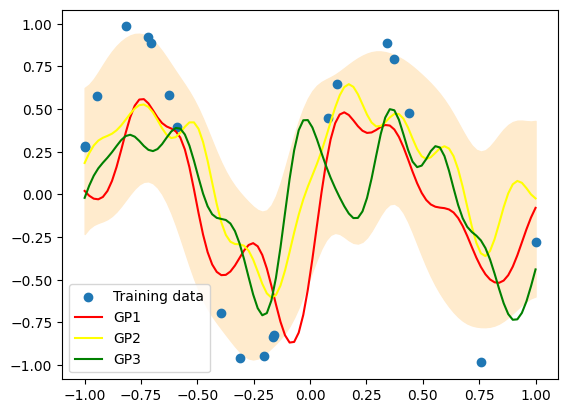

[[-18.07943097]] Log ML


In [8]:
mean, cov, log_ml = posterior(X_test,x_i_reshape,F,0.1,0.5,0.3)

new_mean = mean.flatten()

sample_1 = np.random.multivariate_normal(new_mean, cov)
sample_2 = np.random.multivariate_normal(new_mean, cov)
sample_3 = np.random.multivariate_normal(new_mean, cov)

uncertanity = 2*np.sqrt(np.diag(cov))

y_plus = new_mean + uncertanity
y_min = new_mean - uncertanity

plt.fill_between(x= X_test.flatten(), y1= y_plus, y2 =y_min, color = 'blanchedalmond')
plt.scatter(x_i_reshape, F, label = 'Training data')
plt.plot(X_test, sample_1, color = 'red', label = 'GP1')
plt.plot(X_test, sample_2, color = 'yellow', label = 'GP2')
plt.plot(X_test, sample_3, color = 'green', label = 'GP3')
plt.legend()
plt.show()

print(log_ml, 'Log ML')

It is a bit tricky to visualize, but it seems the certain region is where all the functions are inside the grey area; negative values of the x-axis. 
Instead, the uncertain region is on the positive values of the x-axis. There seems to be more fluctuation and the grey area is more wide. This one should be more uncertain.
I tried to explain using what is written on slide 16.


8. Via trial-and-error, grid or random scan, identify good hyper parameters `l`, `alpha` and `sigma_y`.  They should lead to a large log marginal likelihood. Plot the results of a few settings of the hyperparameters that you tried.

- What are the best-fit parameters that you find?
- What happens when `alpha` is too large or too small?
- What happens when `l` is too large or too small?

In [9]:
# Define the parameter search space
l_test = np.linspace(0.1, 5, 5)      # You can adjust the number of points here for faster execution
sigma_y_test = np.linspace(0.1, 3, 10)
alpha_test = np.linspace(0.1, 3, 10)

# Initialize the maximum value and corresponding parameters
max_posterior_value = -np.inf  # Start with negative infinity, assuming posterior returns positive values
best_params = (None, None, None)  # To store the best (i, j, k) combination

# Iterate over all parameter combinations
for i in l_test:
    for j in alpha_test:
        for k in sigma_y_test:
            # Calculate the posterior for this combination of parameters
            current_value = posterior(X_test, x_i_reshape, F, i, j, k)[2]
            
            # Check if we have a new maximum
            if current_value > max_posterior_value:
                max_posterior_value = current_value
                best_params = (i, j, k)

# After the loops, max_posterior_value contains the maximum posterior value
# and best_params contains the corresponding (l, alpha, sigma_y)
print(f"Max posterior value: {max_posterior_value}")
print(f"Best parameters: l={best_params[0]}, alpha={best_params[1]}, sigma_y={best_params[2]}")


Max posterior value: [[-4.88690403]]
Best parameters: l=0.1, alpha=0.1, sigma_y=0.7444444444444444


9. **(optional exercise)** Let's also now take a look at some real world data. Consider for example, some climate data. Below, I have some data gathered by the [NASA Goddard Institute for Space Studies](https://data.giss.nasa.gov/gistemp/graphs_v4/). This data presents the Land-Ocean Temperature Index, which is the deviation from the mean of the 1951-1980 average temperatures. This measurement is given in degrees Celsius.

   Since measuring global temperature will naturally be a noisy process (things like volcanic eruptions may drag some years down; the measurements in the 1880s were likely not as precise as they are now, etc.), we would assume that the data are not perfect, noiseless measurements.

   Use the data provided below to first, reshape the arrays into the correct shapes, fit the data using your `posteriors` function.

   The $l$ parameter and the $\sigma_y$ parameters are known as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)), which are parameters whose values are used to control the learning process. These parameters cannot be learned through training a machine learning model and instead need to be explored via a grid or random search, in addition to the training of the model itself. This is a big area of the "practical ML" world and those who are good at automatic [hyperparameter tuning](https://www.oreilly.com/library/view/evaluating-machine-learning/9781492048756/ch04.html) can go on to build awesome tools like Google's [AutoML](https://cloud.google.com/automl-tables).


**Your task**

Determine the your preferred choice of hyper parameters `alpha`, `sigma_y` and `l`, and visualize the results, and discuss your choice. There's no "fully correct" choice here, but consider approximately how "noisy" the tempeature deviation is, and consider that the $l$ parameter here effectively controls the timescale of correlations in the data that we are interested in. Plot the results of a few settings of the hyperparameters that you tried, state your final preferred choice, and discuss why you chose it.



In [10]:
years = np.array([1880., 1881., 1882., 1883., 1884., 1885., 1886., 1887., 1888.,
       1889., 1890., 1891., 1892., 1893., 1894., 1895., 1896., 1897.,
       1898., 1899., 1900., 1901., 1902., 1903., 1904., 1905., 1906.,
       1907., 1908., 1909., 1910., 1911., 1912., 1913., 1914., 1915.,
       1916., 1917., 1918., 1919., 1920., 1921., 1922., 1923., 1924.,
       1925., 1926., 1927., 1928., 1929., 1930., 1931., 1932., 1933.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1942.,
       1943., 1944., 1945., 1946., 1947., 1948., 1949., 1950., 1951.,
       1952., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020.])
temperature_index = np.array([-0.16, -0.08, -0.1 , -0.16, -0.28, -0.33, -0.31, -0.36, -0.17,
       -0.1 , -0.35, -0.22, -0.27, -0.31, -0.3 , -0.23, -0.11, -0.11,
       -0.27, -0.17, -0.08, -0.15, -0.27, -0.37, -0.47, -0.26, -0.22,
       -0.38, -0.43, -0.48, -0.43, -0.44, -0.36, -0.34, -0.15, -0.14,
       -0.35, -0.46, -0.3 , -0.28, -0.27, -0.19, -0.28, -0.26, -0.27,
       -0.22, -0.11, -0.22, -0.2 , -0.36, -0.16, -0.1 , -0.16, -0.29,
       -0.13, -0.2 , -0.15, -0.03, -0.01, -0.02,  0.12,  0.18,  0.06,
        0.09,  0.2 ,  0.09, -0.07, -0.03, -0.11, -0.11, -0.18, -0.07,
        0.01,  0.08, -0.13, -0.14, -0.19,  0.05,  0.06,  0.03, -0.03,
        0.06,  0.03,  0.05, -0.2 , -0.11, -0.06, -0.02, -0.08,  0.05,
        0.03, -0.08,  0.01,  0.16, -0.07, -0.01, -0.1 ,  0.18,  0.07,
        0.16,  0.26,  0.32,  0.14,  0.31,  0.16,  0.12,  0.18,  0.32,
        0.39,  0.27,  0.45,  0.41,  0.22,  0.23,  0.32,  0.45,  0.33,
        0.46,  0.61,  0.38,  0.39,  0.54,  0.63,  0.62,  0.54,  0.68,
        0.64,  0.67,  0.55,  0.66,  0.72,  0.61,  0.65,  0.68,  0.75,
        0.9 ,  1.02,  0.93,  0.85,  0.98,  1.02])

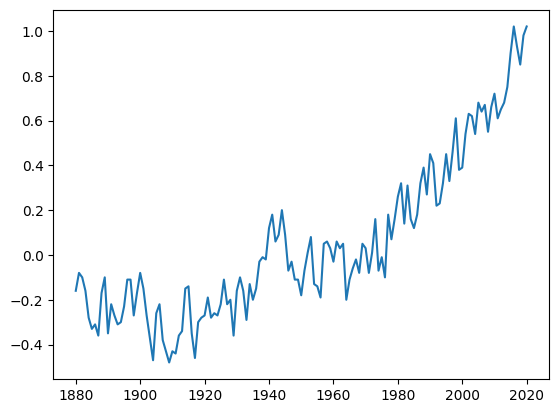

In [11]:
plt.plot(years, temperature_index)
plt.show()

In [12]:
years_matrix = years.reshape((len(temperature_index),1))

temperature_index_vector = temperature_index.reshape(len(temperature_index),1)

years_pred = np.arange(1880,2040,1)

years_matrix_pred = years_pred.reshape(len(years_pred),1)



In [13]:
mean_temp, cov_temp, log_ml_temp = posterior(years_matrix_pred, years_matrix, temperature_index,10,0.6,1)

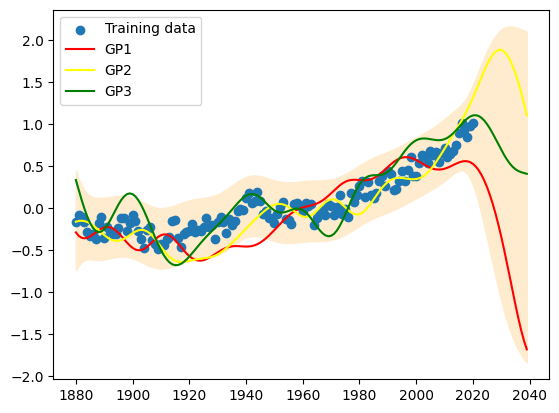

-80.43237873138438 Log ML


In [14]:
new_mean_temp = mean_temp.flatten()

sample_1_temp = np.random.multivariate_normal(new_mean_temp, cov_temp)
sample_2_temp = np.random.multivariate_normal(new_mean_temp, cov_temp)
sample_3_temp = np.random.multivariate_normal(new_mean_temp, cov_temp)

uncertanity_temp = 2*np.sqrt(np.diag(cov_temp))

y_plus_temp = new_mean_temp + uncertanity_temp
y_min_temp = new_mean_temp - uncertanity_temp

plt.fill_between(x= years_matrix_pred.flatten(), y1= y_plus_temp, y2 =y_min_temp, color = 'blanchedalmond')
plt.scatter(years, temperature_index, label = 'Training data')
plt.plot(years_matrix_pred, sample_1_temp, color = 'red', label = 'GP1')
plt.plot(years_matrix_pred, sample_2_temp, color = 'yellow', label = 'GP2')
plt.plot(years_matrix_pred, sample_3_temp, color = 'green', label = 'GP3')
plt.legend()
plt.show()

print(log_ml_temp, 'Log ML')

## Chapter 6: Logistic regression - classification


### 1. Logistic Regression With Numpy

*Murphy 8.2, 8.3.2; Bishop 3.1.3, 4.3.2*

In this exercise, we will implement logistic regression to predict the gender of a person based on their height and weight. We will first do this with regular python and numpy and then introduce [PyTorch](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html), the machine learning package that will be used for the remainder of the class.

First, let's import some data.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [16]:
# Import training data
# This will donwload the training data to the virtual colab data folder
# Colab deletes the stored files every time you close your browser, so make sure to run this cell every time
!wget https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv

zsh:1: command not found: wget


In [18]:
# Read training data
# Now you have access to the label T (0 for Male, 1 for Female), height, and weight for 10,000 data points
data = pd.read_csv("01_heights_weights_genders.csv")
T = np.array([0. if x=='Male' else 1. for x in data['Gender'].values])
H = data['Height'].values
W = data['Weight'].values

print(H.mean())
print(W.mean())

H_mean = H.mean()
W_mean = W.mean()

H_std = H.std()
W_std = W.std()

66.36755975482124
161.44035683283076


1. **(1 pt)** Before we continue, we need to **scale** our data to be in similar ranges. Machine learning algorithms will not work well if the ranges of each dimension are very different. Taking a look at our data, the mean value for height is 66.36 (inches), while the mean for weight is 161 (lbs). These are incompatible and will lead to poor performance. Therefore, before we continue define new variables `H_scaled` and `W_scaled` such that they are [standardized](https://en.wikipedia.org/wiki/Feature_scaling). Also feel free to spend a few minutes reading about other feature scaling options.

In [19]:
H_scaled = (H -H_mean) / H_std
W_scaled = (W -W_mean) / W_std

In [20]:
data['H Scaled'] = H_scaled
data['W Scaled'] = W_scaled

In [21]:
display(data)

,Gender,Height,Weight,H Scaled,W Scaled
0,Male,73.847017,241.893563,1.944061,2.505797
1,Male,68.781904,162.310473,0.627537,0.027101
2,Male,74.110105,212.740856,2.012443,1.597806
3,Male,71.730978,220.042470,1.394060,1.825222
4,Male,69.881796,206.349801,0.913421,1.398750
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050660,-0.768151
9996,Female,67.067155,170.867906,0.181839,0.293631
9997,Female,63.867992,128.475319,-0.649688,-1.026730
9998,Female,69.034243,163.852461,0.693125,0.075127


2. Make a scatter plot of your data, showing the label of the data in color.


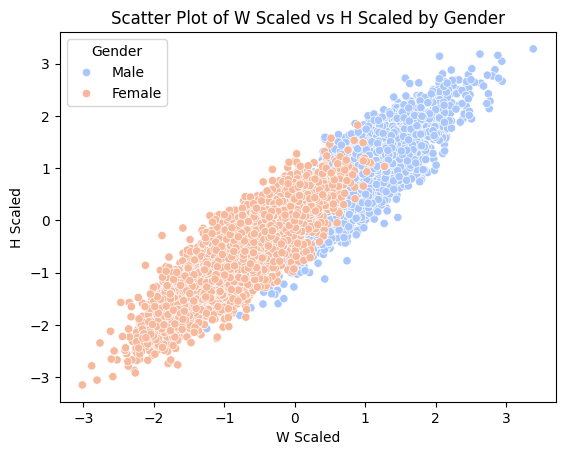

In [22]:
import seaborn as sns
# Create a scatter plot using Seaborn
sns.scatterplot(x='W Scaled', y='H Scaled', hue='Gender', data=data, palette='coolwarm')

# Add plot labels and title
plt.title('Scatter Plot of W Scaled vs H Scaled by Gender')
plt.xlabel('W Scaled')
plt.ylabel('H Scaled')

# Show the plot
plt.show()

3. Currently, our target vector has shape (N,). However, a subtle point of numpy arrays: they can't be one-dimensional if you want to take dot products, so we need to reshape our target array into an (N,1) shape. Additionally, we need to turn our input values array from the two (N,) arrays into a singular array of shape (N,2), where 2 is the number of features we have. Perform this operation below.

In [23]:
T_reshape = T.reshape(len(T),1)

H_scaled_reshape = H_scaled.reshape(len(H_scaled),1)
W_Scaled_reshape = W_scaled.reshape(len(W_scaled),1)

HW_dot = np.dot(H_scaled_reshape, W_Scaled_reshape.T)

HW_dot_2d  = np.column_stack((H_scaled, W_scaled))



4. **(2 pt)** Now we will move onto implementing all that is needed to find an optimal solution for logistic regression using gradient descent.  Remember that our model is defined by
$$
a_n = \boldsymbol{w}^T\boldsymbol{\phi}_n \, ,
$$
$$
y_n = \sigma (a_n) \, .
$$
To start, we will need access to our loss function and our sigmoid. In addition, we will need access to our basis functions $\boldsymbol{\phi}_n$. In this case, $\boldsymbol{\phi}_n = [1, \boldsymbol{x}_n]$ so that we extend our model to include a bias. Implement these below.

In [24]:
def sigmoid(x):
    f = 1 / (1 + np.exp(-x))
    return f

def loss(t, y):
    epsilon = 0.001
    BCE = - np.sum(t * np.log(y + epsilon ) + (1-t)* np.log(1-y + epsilon))
    return BCE

def phi(x):
    one = np.ones((len(x),1))
    phi = np.concatenate((one,x), axis = 1)
    return phi
    

5. Next, we implement our gradient descent. Define a function called `gradient_descent` that takes as input the dataset transformed and in the form of basis $\boldsymbol{\phi}$, the target values, the initial values of the parameters $\boldsymbol{w}$, the number of iterations to perform, and the learning rate. It should return the loss history (the value of the loss at each iteration step) as well as the final value of $\boldsymbol{w}$.

In [25]:
def gradient_descent(x_phi, t, w, n, gamma):
    loss_history = []

    for i in range(n):
        y = sigmoid(np.dot(x_phi, w.T) )

        loss_value = loss(t,y)

        gradient_value = np.dot(x_phi.T, y.T-t.T)

        w-=  gamma * gradient_value

        loss_history.append(loss_value)
    return w,  loss_history

6. Now we have all the building blocks and are ready to train! Below we do a little bit of preprocessing and initialization. Fill in under the instructions below and train your model for 1500 iterations. Experiment a little bit with the value for the learning rate, though a value of  0.0001 is a good starting point.

In [26]:
# Transform X into phi using the function you wrote above
# Question: What are the dimensions of phi_x?
#The dimensions of phi_x will be (10000, 3)

phi_hw = phi(HW_dot_2d) 

# In order to start gradient descent, we initialize our parameters w_init, typically with small values
# Question: Why would initializing with all zeroes be potentially problematic?

w_init = np.random.randn(phi_hw.shape[1])

# Call your gradient_descent function here using the intiailizations from above

w_final, loss_history = gradient_descent(phi_hw, T, w_init, 1500, 0.0001)


7. Plot your loss as a function of iteration. Have the values of the weights converged yet? How can you tell?

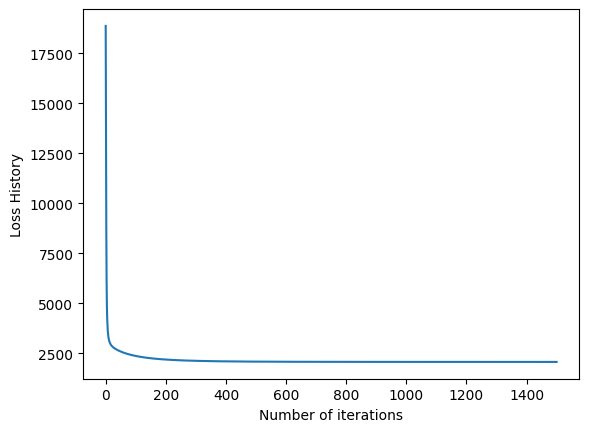

In [27]:
x = np.linspace(0,1500,1500)
plt.plot(x,loss_history)
plt.xlabel('Number of iterations')
plt.ylabel('Loss History')
plt.show()

8. Make a scatter plot of your data, but now showing the output of your logistic regression model as the output.

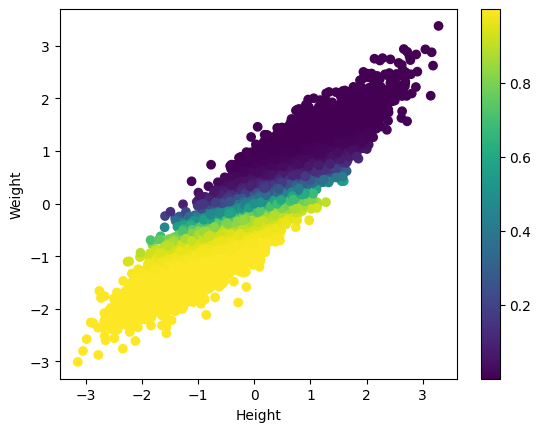

In [28]:
# Your code
y_pred = sigmoid(np.dot(phi_hw,w_final))

plt.scatter(H_scaled, W_scaled, c=y_pred)
plt.colorbar()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

### 2. Logistic Regression With Pytorch

Numpy is a great framework for general scientific computing, but it cannot utilize GPUs to accelerate numerical computations nor is it ideal for machine learning specific tasks. We will therefore use Pytorch, a widely used deep learning package. In fact, logistic regression can be seen as the minimal example of a neural network: it consist of a single neuron with a sigmoid activation function. You will learn more about neural networks later in the course. \\
The most important basic concept is that a Pytorch tensor is the same as a numpy array. In this worked out example we will implement logistic regression in Pytorch in the setting of the previous exercise. You are ecouraged to run the following example and examine carefully each step as this will be an important reference to the next exercises. The following basic [tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) might be helpful to better understand Pytorch.

To train any Pytorch ML model, we need four things: a model definition, a criterion (a loss function), an optimizer (gradient descent for now; we will talk about other optimizers later), and a training routine.

First let's define the model, which we write as a class that inherits from `torch.nn.Module`. We will need one [linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) layer. Skim the Linear layer reference material. This time we do not need to worry about implementing basis functions, since the `torch.nn.Linear()` does this for us. The `forward` function simply computes the value of the prediction `y` given the model parameters. We will talk about why this is called "forward" later in the course.

In [29]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2,1)

    def forward(self,x):
        y = torch.sigmoid(self.linear(x))
        return y

Instantiate your logistic regression model class:

In [30]:
model = LogisticRegression()

Defining the criterion and optimizer is a little bit easier because there are quite a few standard ones.

Find in the documentation and use the built-in torch functions to define a **binary cross-entropy loss** and name it `criterion`, as the following code is based on this naming.



In [31]:
criterion = torch.nn.BCELoss()

We implement batch gradient descent through torch.optim.SGD. This will implement gradient descent on the batch the model receives, since we are passing the whole dataset at once there is nothing stochastic in our case.

In [32]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Everything in torch needs to be a tensor - *including our dataset.*

(Here `X` and `T` are the same data from our previous exercise in numpy)

In [33]:
X_tensor = torch.from_numpy(HW_dot_2d).to(torch.float)
T_tensor = torch.from_numpy(T_reshape).to(torch.float)

In [34]:
display(T_tensor.shape)

torch.Size([10000, 1])

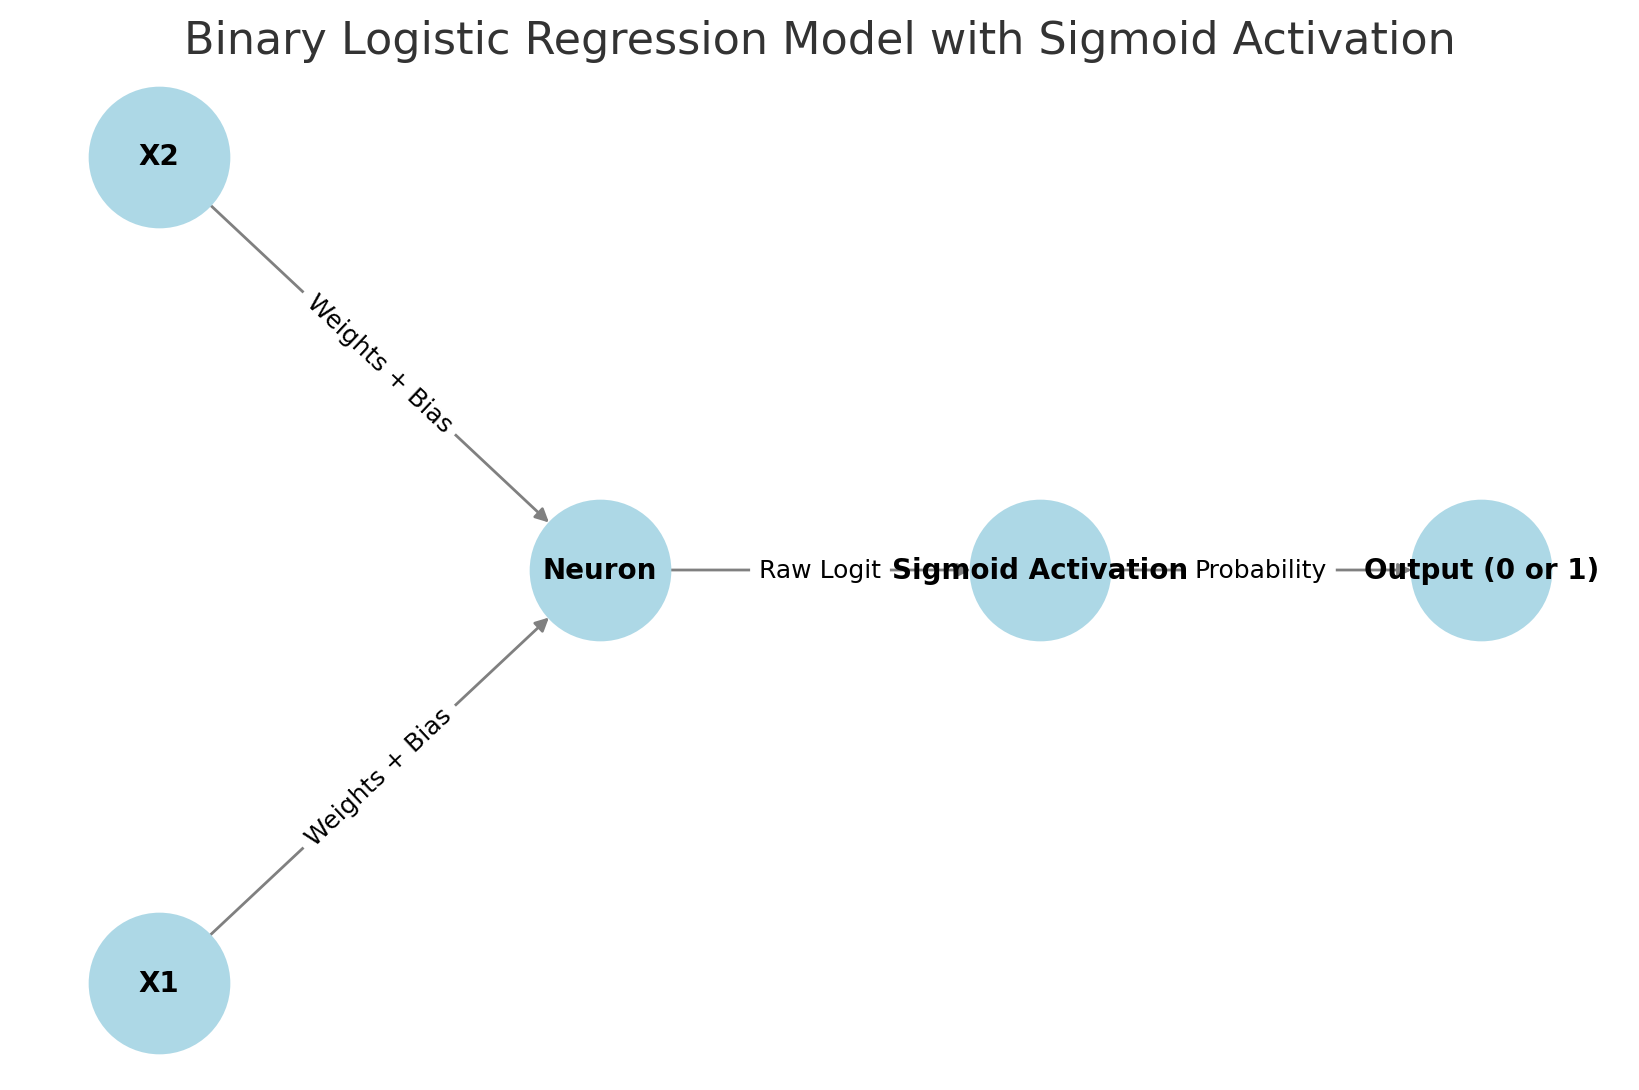

In [35]:
from IPython.display import display
from PIL import Image

# Load and display the image
img = Image.open("Binary Logistic Regression Model with Sigmoid Activation.png")
display(img)

Now let's define the training routine. A key point about Pytorch is that it has two modes: training and evaluation. In training mode, the parameters of the model are allowed to be iteratively changed. In evaluation mode, they are fixed. Whenever you are plotting or calling the model to make predictions, make sure to call `model.eval()` beforehand. Before training, call `model.train()`.

`model.train()` is the first step in the training routine.
Then, we define a loop that does the following things:

- Zero's the gradient. This is important because the gradient of the loss function is what is updating our model weights. We don't want this to be accidentally doing weird things and then the wrong values update our weights.
- Call the model on our X values to make predictions.
- Evaluate the predictions using the loss.
- Evaluate the gradient of the loss (this is known as the *backward* pass; we will discuss why this is called this when we get to neural networks).
- Take an optimizer step.

In [36]:
model.train()

for epoch in range(200000):
    optimizer.zero_grad()

    # forward pass
    Y_pred = model(X_tensor)

    # compute loss
    loss = criterion(Y_pred, T_tensor)
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()
    optimizer.step()

0.4674833416938782
0.3006049692630768
0.27884793281555176
0.2681429088115692
0.2606580853462219
0.2547024190425873
0.24970774352550507
0.2454194873571396
0.24169406294822693
0.23843547701835632
0.23557168245315552
0.23304545879364014
0.23080961406230927
0.2288247048854828
0.22705747187137604
0.2254796326160431
0.22406718134880066
0.22279953956604004
0.22165922820568085
0.22063100337982178
0.21970181167125702
0.2188604772090912
0.21809716522693634
0.2174033373594284
0.21677158772945404
0.2161954641342163
0.21566914021968842
0.215187668800354
0.21474656462669373
0.214341938495636
0.21397025883197784
0.21362847089767456
0.21331386268138885
0.21302387118339539
0.21275627613067627
0.21250922977924347
0.21228083968162537
0.21206951141357422
0.21187379956245422
0.21169240772724152
0.21152426302433014
0.21136806905269623
0.21122314035892487
0.2110883742570877
0.21096298098564148
0.21084631979465485
0.2107376903295517
0.21063652634620667
0.21054218709468842
0.21045419573783875
0.210372045636177

Congratulations on training your first Pytorch model! :) Lastly, let's plot probabilistic predictions for each datapoint.

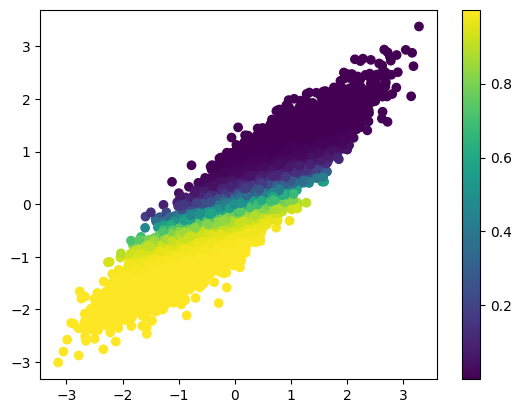

In [37]:
model.eval()
c = [model(torch.tensor([h, w], dtype=torch.float)).detach().numpy() for h, w in zip(H_scaled, W_scaled)]
plt.scatter(H_scaled, W_scaled, c =c)
plt.colorbar()


### 4. Sigmoid

Verify that the derivative of the sigmoid
$$
\sigma(a) = \frac{1}{1 + \exp(-a)} \, ,
$$
is
$$
\frac{d\sigma}{da} = \sigma(1 - \sigma) \, .
$$

In [38]:
from IPython.display import IFrame

# Specify the URL of the PDF file
url = 'https://drive.google.com/file/d/1MlG42kAnfcKmI6dTAhtr0cpmtWMdYzqh/view?usp=share_link'

# Extract the file ID from the URL
file_id = url.split('/')[-2]

# Construct the embedded link
embedded_link = f'https://drive.google.com/file/d/{file_id}/preview'

# Display the PDF file
IFrame(src=embedded_link, width='100%', height='500px')

### 5. Likelihoods

2.Starting with the likelihood of the binary logistic regression
$$
p(\mathbf{t} | \mathbf{w})=\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}} \, ,
$$
show that the negative logarithm of the likelihood gives the *binary cross-entropy* error and that the derivative of the cross entropy error is
$$
\nabla E(\mathbf{w})=\sum_{n=1}^{N}\left(y_{n}-t_{n}\right) \phi_{n} \, .
$$


In [39]:
from IPython.display import IFrame

# Specify the URL of the PDF file
url = 'https://drive.google.com/file/d/1Wu2lJeYEowt_jbZYHQqZShRZ3aFSpcxN/view?usp=share_link'

# Extract the file ID from the URL
file_id = url.split('/')[-2]

# Construct the embedded link
embedded_link = f'https://drive.google.com/file/d/{file_id}/preview'

# Display the PDF file
IFrame(src=embedded_link, width='100%', height='500px')